<a href="https://colab.research.google.com/github/sota1111/DL_Zero4/blob/main/DL_Zero4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys
os.chdir('/content/drive/MyDrive/DL_Zero/DL_Zero4')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git config --global user.email "sota.moro@gmail.com"
!git config --global user.name "sota1111"

In [ ]:
!pip install numpy matplotlib ipython scikit-learn pandas pillow dezero gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from dezero import Variable

# 1章 バンディット問題

## 1.1 機械学習の分類と強化学習

### 1.1.1 教師あり学習

### 1.1.2 教師なし学習

### 1.1.3 強化学習

## 1.2 バンディット問題

### 1.2.1 バンディット問題とは
バンディット：スロットマシンの別称  
バンディット問題における強化学習の枠組みを考える  
- 環境：スロットマシン
- エージェント：プレイヤー
- 行動：プレイヤーは複数台あるスロットマシンから1台を選んでプレイする。  
- 報酬：行動の結果、スロットマシンから受け取るコイン

### 1.2.2 良いスロットマシンとは
スロットマシンをプレイするような確率的事象は「期待値」を使って評価できる。

### 1.2.3 数式を使って表す
確率変数：取る値が確率的に決まる変数
- A：エージェントの行う行動
- E：期待値
- R：報酬
- E[R]：報酬Rの期待値
- E[R|A]：Aという行動を選んだ場合の報酬の期待値  
| の右側に条件を記述
- Q:行動価値
q(A)=E[R|A]

## 1.3 バンディットアルゴリズム
プレイヤーは報酬の期待値が分からない状態で、できるだけ精度良く推定することが求められる。

## 1.4 価値の推定方法
スロットマシンを実際にプレイして得られた報酬→標本平均

### 1.3.2 平均値を求める実装

In [ ]:
import numpy as np

np.random.seed(0)
rewards = []

for n in range(1, 11):# 1~10まで
  reward = np.random.rand() # ダミーの報酬
  rewards.append(reward)
  Q = sum(rewards) / n
  print(Q)

0.5488135039273248
0.6320014351498722
0.6222554154571295
0.6029123573420713
0.567060845741438
0.5801997236289743
0.5598265075766483
0.6013198192273272
0.6415801460355164
0.6157662833145425


Qn-1 = (R1+R2+...+Rn-1)/(n-1)を用いて  
Qn   = (R1+R2+...+Rn)nを変形すると、  
Qn = Qn-1+1/n*(Rn-Qn-1)  
行動価値Qnは前回の行動価値と今回の報酬によって決まる。  
ここで、1/nは学習率としての役割がある。  


In [ ]:
Q = 0

for n in range(1,11):
  reward = np.random.rand()
  Q = Q + (reward - Q)/n
  print(Q)

0.7917250380826646
0.6603099789177845
0.6295548396431672
0.7035652893055406
0.5770594430840099
0.49540441918693173
0.4275207017945595
0.4781580947637318
0.5114912787844116
0.5473433657306523


### 1.3.3 プレイヤーの戦略
- 活用：プレイした結果を利用して、最善と思われるスロットマシンをプレイ（=greedyな行動)
- 探索：スロットマシンの価値を精度良く推定するために、様々なスロットマシンを試す
活用と探索はトレードオフ  
ε-greeedy法：最も基本的で応用の聞くアルゴリズム。  
εの確率で活用を行う。

## 1.4 バンディットアルゴリズムの実装

### 1.4.1 スロットマシンの実装

In [ ]:
#　各マシンを初期化した値より小さい値の場合１を返す
import numpy as np

class Bandit:
  def __init__(self, arms=10):
    self.rates = np.random.rand(arms) # 各マシンの勝率

  def play(self, arm):
    rate = self.rates[arm]
    if rate > np.random.rand():
      return 1
    else:
      return 0

In [ ]:
bandit = Bandit()

for i in range(3):
  print(bandit.play(0))

1
1
1


### 1.4.2 エージェントの実装

In [ ]:
bandit = Bandit()
Q = 0

for n in range(1,11):
  reward = bandit.play(0) #0番目のマシンをプレイ
  Q += (reward - Q) / n
  print(Q)

1.0
0.5
0.33333333333333337
0.5
0.6
0.6666666666666666
0.7142857142857143
0.625
0.6666666666666666
0.6


In [ ]:
# 上のプログラムを配列化しただけ
bandit = Bandit()
Qs = np.zeros(10)
ns = np.zeros(10)

for n in range(10):
  action = np.random.randint(1, 10) #ランダムな行動
  reward = bandit.play(action)

  ns[action] += 1
  Qs[action] += (reward - Qs[action]) / ns[action]
  print(Qs) 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
# 各マシンの報酬を返す。ε-greedyに従ってactionを選択する
class Agent:
  def __init__(self, epsilon, action_size=10):
    self.epsilon = epsilon
    self.Qs = np.zeros(action_size)
    self.ns = np.zeros(action_size)

  def update(self, action, reward):
    self.ns[action] += 1
    self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

  def get_action(self):
    if np.random.rand() < self.epsilon:
      return np.random.randint(0, len(self.Qs))#epsilon 
    return np.argmax(self.Qs)#greedy

### 1.4.3 動かしてみる

872


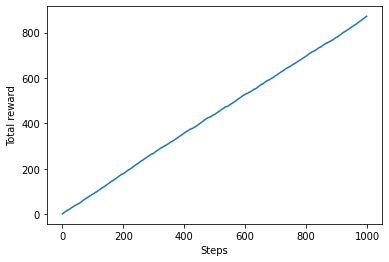

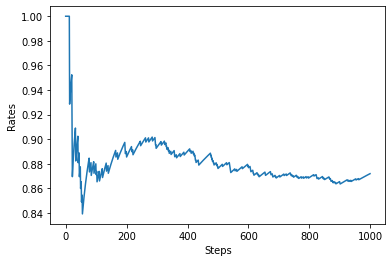

In [ ]:
import matplotlib.pyplot as plt

steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
  action = agent.get_action()  #①行動を選択
  reward = bandit.play(action) #②実際にプレイした報酬を得る
  agent.update(action, reward) #③行動と報酬から学ぶ
  total_reward += reward

  total_rewards.append(total_reward)
  rates.append(total_reward / (step+1))

print(total_reward)

# グラフの描画（１）
plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

# グラフの描画(2)
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

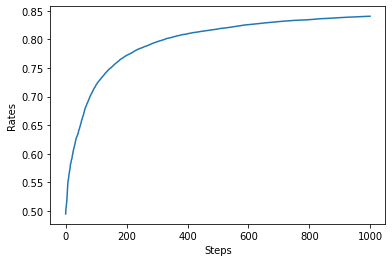

In [ ]:
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps))

for run in range(runs):
  bandit = Bandit()
  agent = Agent(epsilon)
  total_reward = 0
  total_rewards = []
  rates = []
  
  for step in range(steps):
    action = agent.get_action()  #①行動を選択
    reward = bandit.play(action) #②実際にプレイした報酬を得る
    agent.update(action, reward) #③行動と報酬から学ぶ
    total_reward += reward

    total_rewards.append(total_reward)
    rates.append(total_reward / (step+1))

  all_rates[run] = rates # ①報酬の結果を記録する
  
avg_rates = np.average(all_rates, axis=0) # ②各ステップにおける平均を求める

# グラフの描画
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()

## 1.5 非定常問題
- 定常問題：報酬の確率分布が定常である
- 非定常問題：報酬の確率分布が変動する

In [ ]:
# 定常問題
class Bandit:
  def __init__(self, arms=10):
    self.rates = np.random.rand(arms) # 各マシンの勝率

  def play(self, arm):
    rate = self.rates[arm]
    if rate > np.random.rand():
      return 1
    else:
      return 0

In [ ]:
# 非定常問題
class NonStatBandit:
  def __init__(self, arms=10):
    self.arms = arms
    self.rates = np.random.rand(arms) # 各マシンの勝率

  def play(self, arm):
    rate = self.rates[arm]
    self.rates += 0.1 * np.random.randn(self.arms) # ノイズを追加
    if rate > np.random.rand():
      return 1
    else:
      return 0

### 1.5.1 非定常問題を解くためには
Qn = Qn-1+1/n*(Rn-Qn-1)の1/nをα(0<α<1)に変更  
Qn = Qn-1+α*(Rn-Qn-1)
上記のように変形すると、過去の報酬は指数関数的に減少する。

### 1.5.2 非定常問題を解く

In [ ]:
class AlphaAgent:
  def __init__(self, epsilon, alpha, actions=10):
    self.epsilon = epsilon
    self.Qs = np.zeros(actions)
    self.alpha = alpha

  def update(self, action, reward):
    # alphaで更新
    self.Qs[action] += (reward - self.Qs[action]) * self.alpha

  def get_action(self):
    if np.random.rand() < self.epsilon:
      return np.random.randint(0, len(self.Qs))
    return np.argmax(self.Qs)

956


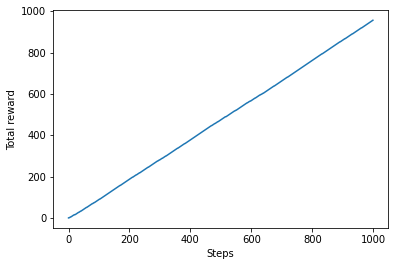

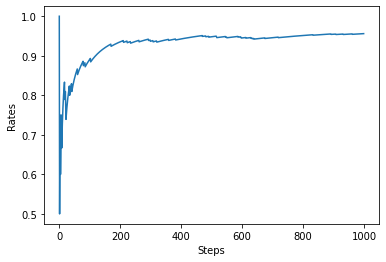

In [ ]:
import matplotlib.pyplot as plt

steps = 1000
epsilon = 0.1
alpha = 0.8

bandit = NonStatBandit()
agent = AlphaAgent(epsilon, alpha)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
  action = agent.get_action()  #①行動を選択
  reward = bandit.play(action) #②実際にプレイした報酬を得る
  agent.update(action, reward) #③行動と報酬から学ぶ
  total_reward += reward

  total_rewards.append(total_reward)
  rates.append(total_reward / (step+1))

print(total_reward)

# グラフの描画（１）
plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

# グラフの描画(2)
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

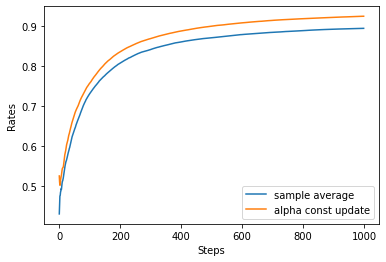

In [ ]:
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps))

for n_alpha in range(2):
  for run in range(runs):
    bandit = NonStatBandit()
    if n_alpha == 0:
      agent = Agent(epsilon)
    else:
      agent = AlphaAgent(epsilon, alpha)

    
    total_reward = 0
    total_rewards = []
    rates = []
    
    for step in range(steps):
      action = agent.get_action()  #①行動を選択
      reward = bandit.play(action) #②実際にプレイした報酬を得る
      agent.update(action, reward) #③行動と報酬から学ぶ
      total_reward += reward

      total_rewards.append(total_reward)
      rates.append(total_reward / (step+1))

    all_rates[run] = rates # ①報酬の結果を記録する
    
  avg_rates = np.average(all_rates, axis=0) # ②各ステップにおける平均を求める

  # グラフの描画
  plt.ylabel('Rates')
  plt.xlabel('Steps')
  plt.plot(avg_rates)
plt.legend(["sample average", "alpha const update"])
plt.show()

# 2章 マルコフ決定過程
エージェントの行動によって環境の状態が変化する問題を考える。  
そのような問題の一部は**マルコフ決定過程**として定式化される。  

## 2.1 MDPとは
- MDP：Mrkov Dicision Process
- 決定過程：エージェントが（環境と相互作用しながら）行動を決定する過程

### 2.1.1 MDPの具体例
- 状態：エージェントの行動により変わるエージェントの状況

### 2.1.2 エージェントと環境のやりとり

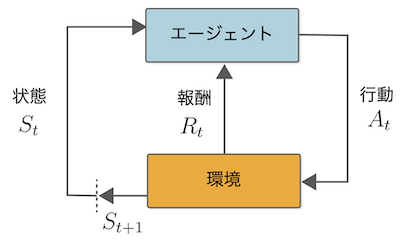

In [ ]:
from IPython.display import Image,display_png
display_png(Image('png/MDPのサイクル.png'))

## 2.2 環境とエージェントの定式化
以下の三つを数式により定式化する
- 状態遷移：状態はどのように遷移するのか
- 報酬：報酬はどのように与えられるか
- 方策：エージェントはどのように行動を決定するか

### 2.2.1 状態遷移
決定論的な状態遷移の場合、次の状態s'は状態sと行動aによって一意に決まる。  
s' = f(s, a)  
f(s, a)：状態遷移関数
確率論的な状態遷移の場合、エージェントが状態sで、行動aを行った時、次の状態s'に移動する確率  
p(s'|s, a)：状態遷移確率  

マルコフ性：現在の状態sと行動aだけに依存して、次の状態s'が決まる

### 2.2.2 報酬関数
報酬関数：エージェントが状態sにいて、行動aを行い、次の状態s'になった時に得られる報酬をr(s, a, s')で定義  


### 2.2.3 エージェントの方策
- 決定論的な方策：a=u(s)
- 確率論的な方策：π(a|s)  
ある状態sにいる時に行動aを取る確率

## 2.3 MDPの目標
- 方策π(a|s)によって行動し、
- その行動と状態遷移確率p(s'|s, a)によって次の状態に遷移し、
- 報酬関数r(s, a, s')に従って報酬が与えられる。
最大方策：上記の枠組みの中で、収益が最大となる最適方策を見つける。

## 2.3.1 エピソードタスクと連続タスク
- エピソードタスク：終わりのある問題
- 連続タスク：終わりのない問題

### 2.3.2 収益
収益Gt=Rt0+rRt1+r^2*Rt2+...
r：割引率

### 2.3.3 状態価値関数
収益の期待値：vπ(s)=E[Gt|St=s, π]  
vπ(s)：状態価値関数  
状態s、方策πのときの報酬の期待値


### 2.3.4 最適方策と最適価値関数
v*：最適状態価値関数

## 2.4 MDPの例

# 3章 ベルマン方程式
ベルマン方程式：MDPで成り立つ最も重要な方程式  
「状態sの価値関数」と「その次に取りうる状態s'の価値関数」との関係性を表したもの

## 3.1 ベルマン方程式の導出

## 3.1.1 確率と期待値
p(y|x)：条件付き確率
p(x,y)=p(x)p(y|x)：xとyが同時に起こる確率

### 3.1.2 ベルマン方程式の導出


一回自分で机上で計算した方が良い。

## 3.2 ベルマン方程式の例

### 3.2.1 ２マスのグリッドワールド


### 3.2.2 ベルマン方程式の意義
ベルマン方程式を使えば、ランダムな振る舞いの状態価値関数を求められる。

## 3.3 行動価値関数とベルマン方程式
行動価値関数を導く

### 3.3.1 行動価値関数
状態価値関数  
vπ(s)=Eπ[Gt|St=s]  
行動価値関数：Q関数  
qπ(s,a)=Eπ[Gt|St=s, At=a]  
Q関数は、時刻tの時に状態sで行動aを取り、時刻t+1では方策πに従った行動を取る。

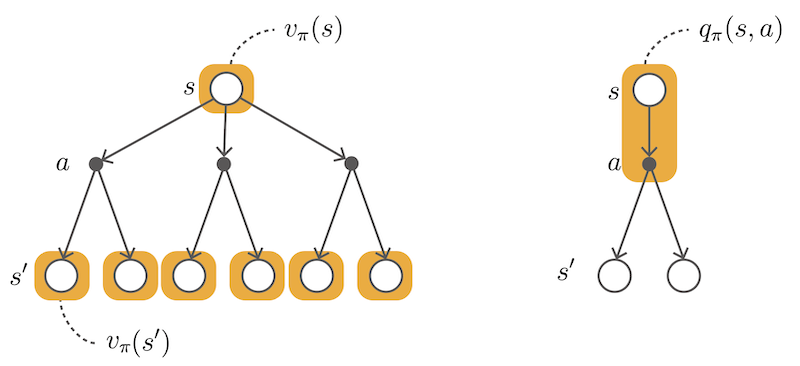

In [ ]:
from IPython.display import Image,display_png
display_png(Image('png/状態価値関数とQ関数.png'))

### 3.3.2 行動価値関数を使ったベルマン方程式


## 3.4 ベルマン最適方程式
最適方策：すべての状態において、状態価値関数が最大となる方策  

### 3.4.1 状態価値関数におけるベルマン最適方程式

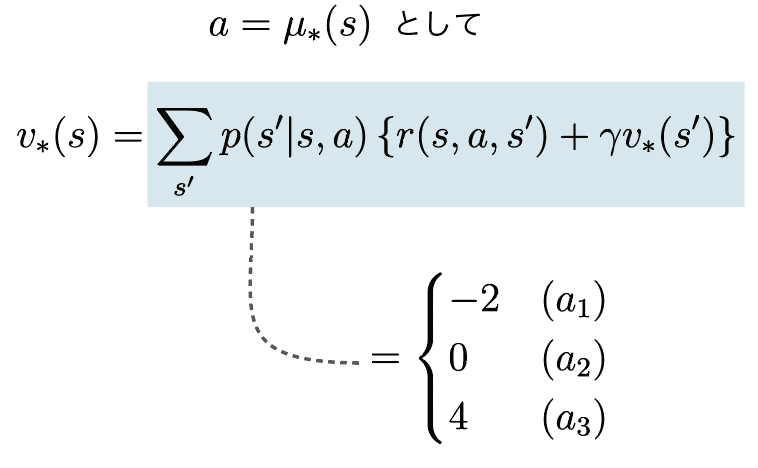

In [ ]:
from IPython.display import Image,display_png
display_png(Image('png/最適方策の価値関数.png'))

ベルマン最適方程式：上式の青枠が最大値を取る行動を取ったとき価値

### 3.4.2 Q関数におけるベルマン最適方程式
Q関数におけるベルマン最適方程式を示す。

## 3.5 ベルマン最適方程式の例

### 3.5.1 ベルマン最適方程式の適用

### 3.5.2 最適方策を得る

## 3.6 まとめ
以下の三式が重要
- ベルマン方程式
- ベルマン最適方程式
- 最適方策

#  4章 動的計画法
ベルマン方程式を用いれば、連立方程式が立ち、それを解けば価値関数が求まる。

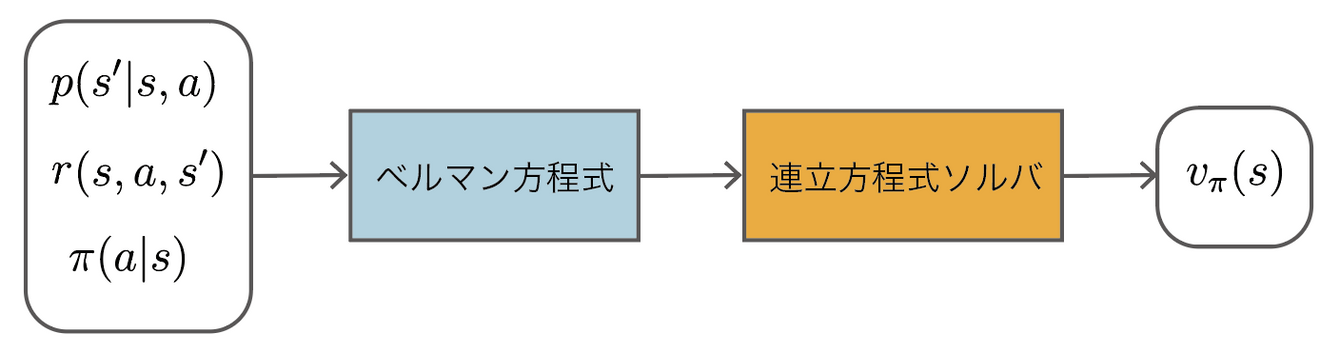

In [ ]:
from IPython.display import Image,display_png
display_png(Image('png/ベルマン方程式を使って価値関数を求める流れ.png'))

上記の流れで解けるのは、小さな問題のみ。  
→動的計画法を用いる。

## 4.1 動的計画法と方策評価
- 方策強化：ある方策πが与えられた時に、その方策の価値関数vπ(s)やqπ(s,a)を求めること
- 方策制御：方策を制御して最適方策へと調整する

## 4.1.1 動的計画法の概要
- ベルマン方程式：「状態sの価値関数」と「その次に取りうる状態s'の価値関数」との関係性を表したもの
ベルマン方程式を更新式へ変換する。  
- Vk：次に取りうる状態の価値関数
- Vk+1：今いる状態の価値関数
を更新する式となる。  
*なんで更新式に変形できるか分からない。*
- ブートストラップ：「推定式：Vk(s')」を使って、「別の推定値V(k+1)」を改善するプロセス

V0(s)→V1(s)→V2(s)...を繰り返し更新すると、最終的なゴールVπ(s)に近づく。

**動的計画法**
- アルゴリズムの総称
- 対象とする問題を小さな問題に分割して答えを求める手法一般を指す。
- エッセンスは「同じ計算を2度としないこと」
- 実現方法は、「トップダウン方式」、「ボトムアップ方式」
- トップダウン方式：メモ化
- ボトムアップ方式：一つずつ繰り上げる

## 4.1.2 反復方策評価を試す

In [ ]:
V = {'L1':0.0, 'L2':0.0}
new_V = V.copy()

for _ in range(100):
  new_V['L1'] = 0.5*(-1+0.9*V['L1'])+0.5*( 1+0.9*V['L2'])
  new_V['L2'] = 0.5*(0 +0.9*V['L1'])+0.5*(-1+0.9*V['L2'])
  V = new_V.copy()
  #print(V)

In [ ]:
V = {'L1':0.0, 'L2':0.0}
new_V = V.copy()

cnt = 0 #何回更新したかを記録
while True:
  new_V['L1'] = 0.5*(-1+0.9*V['L1'])+0.5*( 1+0.9*V['L2'])
  new_V['L2'] = 0.5*(0 +0.9*V['L1'])+0.5*(-1+0.9*V['L2'])

  #更新された量の最大値
  delta = abs(new_V['L1'] - V['L1'])
  delta = max(delta, abs(new_V['L2'] - V['L2']))
  V = new_V.copy()
  #print(delta)
  cnt += 1
  if delta < 0.0001:
    print(V)
    print(cnt)
    break

{'L1': -2.249167525908671, 'L2': -2.749167525908671}
76


### 4.1.3 反復方策評価の別の実装方法
各要素を上書きする方法

In [ ]:
V = {'L1':0.0, 'L2':0.0}
new_V = V.copy()

cnt = 0 #何回更新したかを記録
while True:
  t = 0.5*(-1+0.9*V['L1'])+0.5*( 1+0.9*V['L2'])
  delta = abs(t - V['L1'])
  V['L1'] = t

  t = 0.5*(0 +0.9*V['L1'])+0.5*(-1+0.9*V['L2'])
  delta = max(delta, abs(t - V['L2']))
  V['L2'] = t

  cnt += 1
  if delta < 0.0001:
    print(V)
    print(cnt)
    break

{'L1': -2.2493782177156936, 'L2': -2.7494201578106514}
60


## 4.2 より大きな問題へ

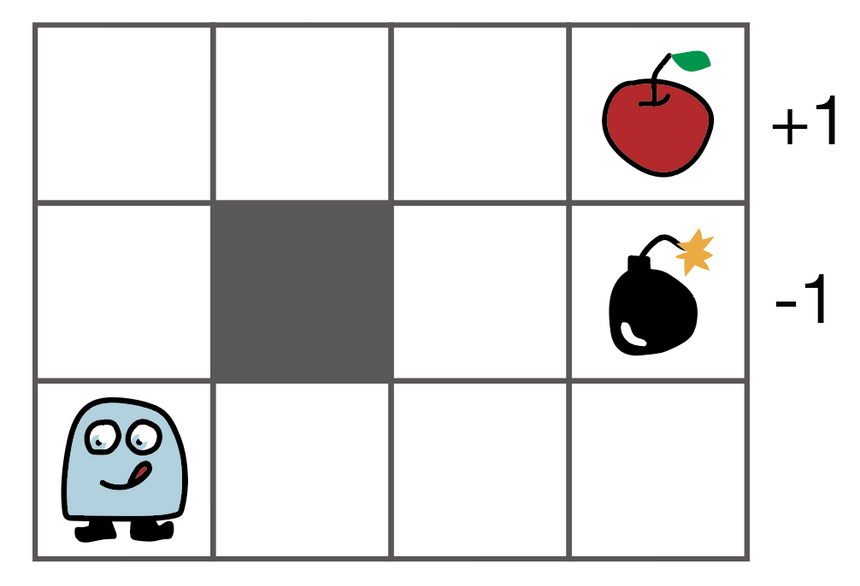

In [ ]:
from IPython.display import Image,display_png
display_png(Image('png/3X4のグリッドワールド.png'))

### 4.2.1 GridWorldクラスの実装

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


class Renderer:
    def __init__(self, reward_map, goal_state, wall_state):
        self.reward_map = reward_map
        self.goal_state = goal_state
        self.wall_state = wall_state
        self.ys = len(self.reward_map)
        self.xs = len(self.reward_map[0])

        self.ax = None
        self.fig = None
        self.first_flg = True

    def set_figure(self, figsize=None):
        fig = plt.figure(figsize=figsize)
        self.ax = fig.add_subplot(111)
        ax = self.ax
        ax.clear()
        ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
        ax.set_xticks(range(self.xs))
        ax.set_yticks(range(self.ys))
        ax.set_xlim(0, self.xs)
        ax.set_ylim(0, self.ys)
        ax.grid(True)

    def render_v(self, v=None, policy=None, print_value=True):
        self.set_figure()

        ys, xs = self.ys, self.xs
        ax = self.ax

        if v is not None:
            color_list = ['red', 'white', 'green']
            cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
                'colormap_name', color_list)

            # dict -> ndarray
            v_dict = v
            v = np.zeros(self.reward_map.shape)
            for state, value in v_dict.items():
                v[state] = value

            vmax, vmin = v.max(), v.min()
            vmax = max(vmax, abs(vmin))
            vmin = -1 * vmax
            vmax = 1 if vmax < 1 else vmax
            vmin = -1 if vmin > -1 else vmin

            ax.pcolormesh(np.flipud(v), cmap=cmap, vmin=vmin, vmax=vmax)

        for y in range(ys):
            for x in range(xs):
                state = (y, x)
                r = self.reward_map[y, x]
                if r != 0 and r is not None:
                    txt = 'R ' + str(r)
                    if state == self.goal_state:
                        txt = txt + ' (GOAL)'
                    ax.text(x+.1, ys-y-0.9, txt)

                if (v is not None) and state != self.wall_state:
                    if print_value:
                        offsets = [(0.4, -0.15), (-0.15, -0.3)]
                        key = 0
                        if v.shape[0] > 7: key = 1
                        offset = offsets[key]
                        ax.text(x+offset[0], ys-y+offset[1], "{:12.2f}".format(v[y, x]))

                if policy is not None and state != self.wall_state:
                    actions = policy[state]
                    max_actions = [kv[0] for kv in actions.items() if kv[1] == max(actions.values())]

                    arrows = ["↑", "↓", "←", "→"]
                    offsets = [(0, 0.1), (0, -0.1), (-0.1, 0), (0.1, 0)]
                    for action in max_actions:
                        arrow = arrows[action]
                        offset = offsets[action]
                        if state == self.goal_state:
                            continue
                        ax.text(x+0.45+offset[0], ys-y-0.5+offset[1], arrow)

                if state == self.wall_state:
                    ax.add_patch(plt.Rectangle((x,ys-y-1), 1, 1, fc=(0.4, 0.4, 0.4, 1.)))
        plt.show()

    def render_q(self, q, show_greedy_policy=True):
        self.set_figure()

        ys, xs = self.ys, self.xs
        ax = self.ax
        action_space = [0, 1, 2, 3]

        qmax, qmin = max(q.values()), min(q.values())
        qmax = max(qmax, abs(qmin))
        qmin = -1 * qmax
        qmax = 1 if qmax < 1 else qmax
        qmin = -1 if qmin > -1 else qmin


        color_list = ['red', 'white', 'green']
        cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
            'colormap_name', color_list)

        for y in range(ys):
            for x in range(xs):
                for action in action_space:
                    state = (y, x)
                    r = self.reward_map[y, x]
                    if r != 0 and r is not None:
                        txt = 'R ' + str(r)
                        if state == self.goal_state:
                            txt = txt + ' (GOAL)'
                        ax.text(x+.05, ys-y-0.95, txt)

                    if state == self.goal_state:
                        continue

                    tx, ty = x, ys-y-1

                    action_map = {
                        0: ((0.5+tx, 0.5+ty), (tx+1, ty+1), (tx, ty+1)),
                        1: ((tx, ty), (tx+1, ty), (tx+0.5, ty+0.5)),
                        2: ((tx, ty), (tx+0.5, ty+0.5), (tx, ty+1)),
                        3: ((0.5+tx, 0.5+ty), (tx+1, ty), (tx+1, ty+1)),
                    }
                    offset_map = {
                        0: (0.1, 0.8),
                        1: (0.1, 0.1),
                        2: (-0.2, 0.4),
                        3: (0.4, 0.4),
                    }
                    if state == self.wall_state:
                        ax.add_patch(plt.Rectangle((tx, ty), 1, 1, fc=(0.4, 0.4, 0.4, 1.)))
                    elif state in self.goal_state:
                        ax.add_patch(plt.Rectangle((tx, ty), 1, 1, fc=(0., 1., 0., 1.)))
                    else:

                        tq = q[(state, action)]
                        color_scale = 0.5 + (tq / qmax) / 2  # normalize: 0.0-1.0

                        poly = plt.Polygon(action_map[action],fc=cmap(color_scale))
                        ax.add_patch(poly)

                        offset= offset_map[action]
                        ax.text(tx+offset[0], ty+offset[1], "{:12.2f}".format(tq))
        plt.show()

        if show_greedy_policy:
            policy = {}
            for y in range(self.ys):
                for x in range(self.xs):
                    state = (y, x)
                    qs = [q[state, action] for action in range(4)]  # action_size
                    max_action = np.argmax(qs)
                    probs = {0:0.0, 1:0.0, 2:0.0, 3:0.0}
                    probs[max_action] = 1
                    policy[state] = probs
            self.render_v(None, policy)

In [ ]:
import numpy as np

class GridWorld:
  def __init__(self):
    self.action_space = [0, 1, 2, 3]
    self.action_meaning = {
        0:"UP",
        1:"DOWN",
        2:"LEFT",
        3:"RIGHT"
    }

    self.reward_map = np.array(
        [[0, 0, 0, 1],
         [0, None, 0, -1],
         [0,0,0,0]]
    )
    self.goal_state = (0, 3)
    self.wall_state = (1, 1)
    self.start_state = (2, 0)
    self.agent_state = self.start_state

  @property #インスタンス変数として使用できる
  def height(self):
    return len(self.reward_map)

  @property
  def width(self):
    return len(self.reward_map[0])

  @property
  def shape(self):
    return self.reward_map.shape

  def actions(self):
    return self.action_space

  def states(self):
    for h in range(self.height):
      for w in range(self.width):
        yield (h, w) #関数を一時停止して別の処理に移る
  
  def next_state(self, state, action):
    #①移動先の場所の計算
    action_move_map = [(-1,0),(1,0),(0,-1),(0,1)]
    move = action_move_map[action]
    next_state = (state[0]+move[0], state[1]+move[1])
    ny, nx = next_state

    #②移動先がグリッドワールドの枠の外か、それとも移動先が壁か？
    if nx < 0 or nx >= self.width or ny < 0 or ny >= self.height:
      next_state = state
    elif next_state == self.wall_state:
      next_state = state

    return next_state

  def reward(self, state, action, next_state):
    return self.reward_map[next_state]
    
  def reset(self):
      self.agent_state = self.start_state
      return self.agent_state

  def step(self, action):
      state = self.agent_state
      next_state = self.next_state(state, action)
      reward = self.reward(state, action, next_state)
      done = (next_state == self.goal_state)

      self.agent_state = next_state
      return next_state, reward, done

  def render_v(self, v=None, policy=None, print_value=True):
    renderer = Renderer(self.reward_map, self.goal_state,
                                      self.wall_state)
    renderer.render_v(v, policy, print_value)

  def render_q(self, q=None, print_value=True):
      renderer = Renderer(self.reward_map, self.goal_state,
                                        self.wall_state)
      renderer.render_q(q, print_value)

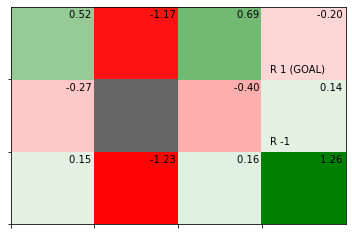

In [ ]:
env = GridWorld()
V = {}
for state in env.states():
  V[state] = np.random.randn() #ダミーの状態価値関数
env.render_v(V)

### 4.2.2 defaultdictの使い方

In [ ]:
env = GridWorld()
V = {}

# ディクショナリの要素の初期化
for state in env.states():
  V[state] = 0

state = (1,2)
print(V[state])

0


In [ ]:
from collections import defaultdict

env =GridWorld()
V = defaultdict(lambda: 0) #Vを通常のディクショナリとして使える

state = (1, 2)
print(V[state])

0


In [ ]:
pi = defaultdict(lambda: {0: 0.25, 1:0.25, 2:0.25, 3:0.25})

state = (0, 1)
print(pi[state])

{0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}


### 4.2.3 反復方策評価の実装

In [ ]:
def eval_onestep(pi, V, env, gamma=0.9):
  for state in env.states(): #①各状態へのアクセス
    if state == env.goal_state: #②ゴールの価値関数は常に０
      V[state] = 0
      continue
    
    action_probs = pi[state] #probsはprobabilitiesの略
    new_V = 0

    #③各行動へのアクセス
    for action, action_prob in action_probs.items():
      next_state = env.next_state(state, action)
      r = env.reward(state, action, next_state)
      #④新しい価値関数
      new_V += action_prob * (r + gamma*V[next_state])
    V[state] = new_V
  return V

In [ ]:
def policy_eval(pi, V, env, gamma, threshold=0.001):
  while True:
    old_V = V.copy() #更新前の価値関数
    V = eval_onestep(pi, V, env, gamma)

    #更新された量の最大値を求める
    delta = 0
    for state in V.keys():
      t = abs(V[state] - old_V[state])
      if delta < t:
        delta = t
    #閾値との比較
    if delta < threshold:
      break
  return V

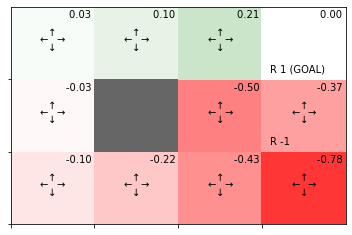

In [ ]:
env = GridWorld()
gamma = 0.9
pi = defaultdict(lambda: {0: 0.25, 1:0.25, 2:0.25, 3:0.25})
V = defaultdict(lambda: 0)
V = policy_eval(pi, V, env, gamma)
env.render_v(V, pi)

## 4.3 方策反復法
最適方策を得るためには、ベルマン最適方程式を満たす連立方程式を解く。  
↑は計算量的に問題がある。状態のサイズをS、行動のサイズをAとすると、A^Sのオーダーの計算量が必要。解くのではなく、改善することで解を求める。  
反復方策評価によって、状態価値関数が求まり、それを基に最適方策を更新する。

### 4.3.1 方策の改善
次の記号を用いて、方策を改善する方法を示す。
- 最適方策：u*(s)
- 最適方策における状態価値関数：v*(s)
- 最適方策における行動価値関数：q*(s,a)  
最適価値関数v*  
と最適方策u*は「鶏と卵の関係」。  
以下のように式を適用する。
- 現状の方策：u(s)
- 方策u(s)における状態価値関数：vu(s)
- 新たな方策：u'(s)  
この時、すべての状態において、u(s)とu'(s)が同じであれば、方策u(s)は最適方策  
方策をgreedy化すると、
- 方策は常に改善される
- 方策の更新がなければ、それが最適方策

### 4.3.2 評価と改善を繰り返す


以下の流れで最適方策を見つける。

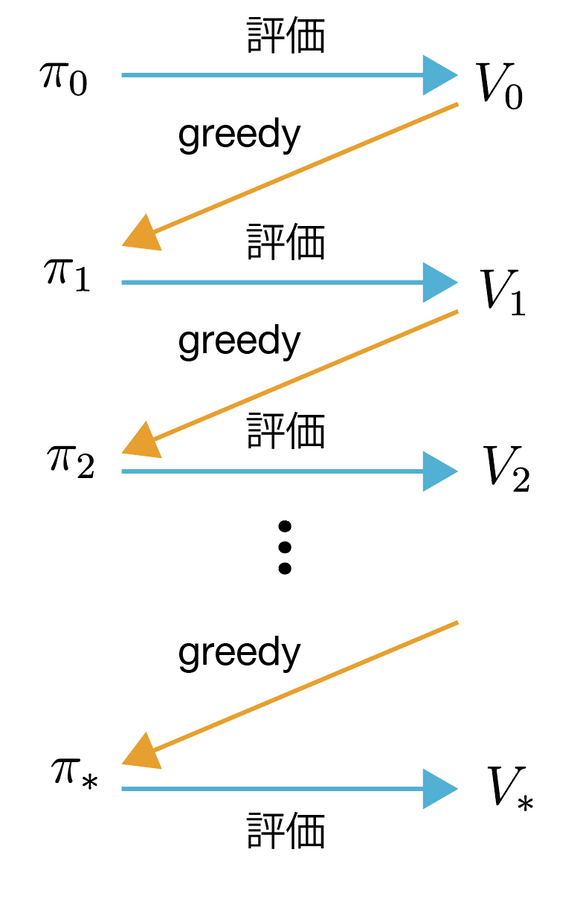

In [ ]:
from IPython.display import Image,display_png
display_png(Image('png/方策改善のプロセス.png'))

## 4.4 方策反復法の実装

### 4.4.1 方策の改善

In [ ]:
def argmax(d):
  max_value = max(d.values())
  max_key = 0
  for key, value in d.items():
    if value == max_value:
      max_key = key
  return max_key

In [ ]:
action_values = {0: 0.1, 1: -0.3, 2: 9.9, 3: -1.3}
print(action_values.items())
max_action = argmax(action_values)
print(max_action)

dict_items([(0, 0.1), (1, -0.3), (2, 9.9), (3, -1.3)])
2


In [ ]:
def greedy_policy(V, env, gamma):
  pi = {}

  for state in env.states():
    action_values = {}

    for action in env.actions():
      next_state = env.next_state(state, action)
      r = env.reward(state, action, next_state)
      value = r + gamma * V[next_state] #①
      action_values[action] = value
      max_action = argmax(action_values) #②
      action_probs = {0: 0, 1: 0, 2: 0, 3: 0}
      action_probs[max_action] = 1.0
      pi[state] = action_probs #③
  return pi

### 4.4.2 評価と改善を繰り返す
方策反復法の引数は、
- env：環境
- gamma：割引率
- threshold：方策評価更新停止閾値
- isrender：方策の評価・改善を行う過程を描画するかどうかのフラグ

In [ ]:
def policy_iter(env, gamma, threshold=0.001, is_render=True):
  pi = defaultdict(lambda: {0: 0.25, 1:0.25, 2:0.25, 3:0.25})
  V = defaultdict(lambda: 0)

  while True:
    V = policy_eval(pi, V, env, gamma, threshold) #①評価
    new_pi = greedy_policy(V, env, gamma)#②改善

    if is_render:
      env.render_v(V, pi)

    if new_pi == pi: #③更新チェック
      break
    pi = new_pi
  
  return pi

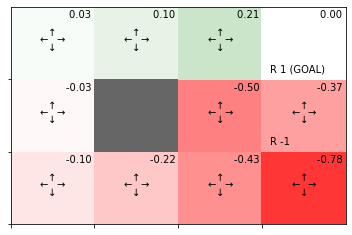

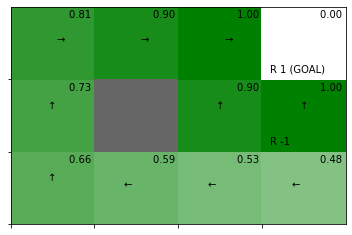

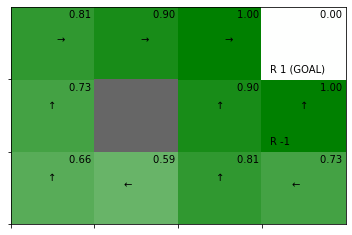

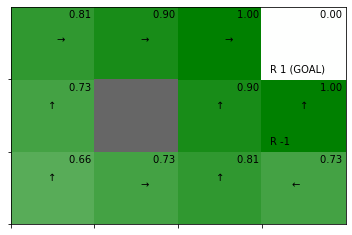

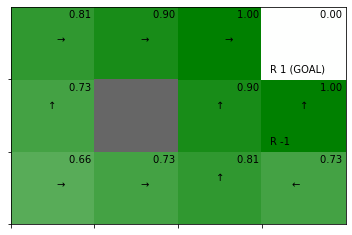

In [ ]:
env = GridWorld()
gamma = 0.9
pi = policy_iter(env, gamma)

## 4.5 価値反復法
方策反復法は、  
「評価」：方策uを評価してVuを得て、  
「改善」：Vをgreedy化を繰り返すことで、  
Vとuを更新し、v*
とu*にたどり着いた。  
図を追加する。  

価値反復法では、「評価」と「改善」を最小限に行う

### 4.5.1 価値反復法の導出
価値反復法は1つの状態を一度更新したら、すぐに改善フェーズに移行する。

### 4.5.2 価値反復法の実装

In [ ]:
def value_iter_oneshop(V, env, gamma):
  for state in env.states(): #①すべての状態にアクセス
    if state == env.goal_state: #ゴールの価値関数は常に0
      V[state] = 0
      continue

    action_values = []
    for action in env.actions(): #②すべての行動にアクセス
      next_state = env.next_state(state, action)
      r = env.reward(state, action, next_state)
      value = r + gamma * V[next_state] #③新しい価値関数
      action_values.append(value)

    V[state] = max(action_values) #④最大値を取り出す
  return V

In [ ]:
def value_iter(V, env, gamma, threshold=0.001, is_render=False):
  while True:
    if is_render:
      env.render_v(V)

    old_V = V.copy() #更新前の価値関数
    V = value_iter_oneshop(V, env, gamma)

    #更新された量の最大値を求める
    delta = 0
    for state in V.keys():
      t = abs(V[state] - old_V[state])
      if delta < t:
        delta = t
    #閾値との比較
    if delta < threshold:
      break
  return V

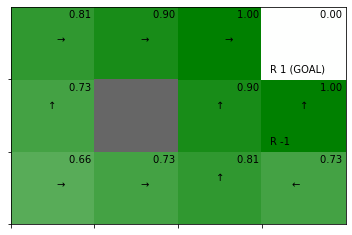

In [ ]:
V = defaultdict(lambda: 0)
env = GridWorld()
gamma = 0.9

V = value_iter(V, env, gamma)

pi = greedy_policy(V, env, gamma)
env.render_v(V, pi)

# 5章 モンテカルロ法
- DPは「環境のモデル（状態遷移確率と報酬関数）が既知である必要がある。また、計算量が膨大である。  
- モンテカルロ法：データのサンプリングを繰り返し行って、その結果から推定する手法の総称。  
- 強化学習では、経験から価値関数を推定し、最適方策を見つける。

## 5.1 モンテカルロ法

### 5.1.1 サイコロの目の和

In [ ]:
ps = {2: 1/36, 3: 2/36, 4: 3/36, 5: 4/36, 6: 5/36, 7: 6/36, 8: 5/36, 9: 4/36, 10: 3/36, 11: 2/36, 12: 1/36 }
V = 0
for x, p in ps.items():
  V += x*p
print(V)

6.999999999999999


### 5.1.2 分布モデルとサンプルモデル
- 分布モデル：確率分布として表されたモデル
- サンプルモデル：サンプリングさえできれば良いモデル

In [ ]:
import numpy as np
def sample(dices=2):
  x = 0
  for _ in range(dices):
    x += np.random.choice([1,2,3,4,5,6])
  return x

In [ ]:
print(sample())
print(sample())
print(sample())

7
9
9


### 5.1.3 モンテカルロ法の実装


In [ ]:
trial = 1000

samples = []
for _ in range(trial):
  s = sample()
  samples.append(s)
V = sum(samples)/len(samples)
print(V)

7.031


In [ ]:
# サンプルデータを取るたびに平均値を求める
trial = 1000

samples =[]
for _ in range(trial):
  s = sample()
  samples.append(s)
  V = sum(samples)/len(samples)
print(V)

6.948


In [ ]:
# インクリメンタルな方式で計算する
trial = 1000
V, n = 0, 0
for _ in range(trial):
  s = sample()
  n += 1
  V += (s - V) / n # もしくはV = V + (s-n)/n
print(V)

7.083999999999998


## 5.2 モンテカルロ法による方策の評価
モンテカルロ法を強化学習に適用する。  
エージェントが行動して得た経験から価値関数を推定する。  
方策πが与えられた時、その方策の価値関数を計算する。

### 5.2.1 価値関数をモンテカルロ法で求める
価値関数vπ：方策πに従って行動した時に得られる収益Gの期待値

### 5.2.2 すべての状態の価値関数を求める
エージェントの開始位置が固定されていても、エピソードを繰り返すうちにすべての状態を経由できれば、すべての状態についての収益のサンプルを集めることができる。

### 5.2.3 モンテカルロ法の効率の良い実装
GA = R0 + rGB    
GB = R1 + rGC  
GC = R2  
のように書けば、順に収益が計算でき、重複した計算を省くことができる。

## 5.3 モンテカルロ法の実装

### 5.3.1 stepメソッド

In [ ]:
env = GridWorld()
action = 0 #ダミーの行動
next_state, reward, done = env.step(action)

print('next_state:', next_state)
print('reward:', reward)
print('done:', done)

next_state: (1, 0)
reward: 0
done: False


In [ ]:
env = GridWorld()
state = env.reset()
state

(2, 0)

### 5.3.2 エージェントクラスの実装

In [ ]:
# モンテカルロ法を用いて方策評価を行うエージェントを実装する
class RandomAgent:
  def __init__(self):
    self.gamma = 0.9
    self.action_size = 4

    random_actions = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
    self.pi = defaultdict(lambda: random_actions)
    self.V = defaultdict(lambda: 0)
    self.cnts = defaultdict(lambda: 0)
    self.memory = []
    
  def get_action(self, state):
    action_probs = self.pi[state]
    #print('action_probs: ', action_probs)
    #print('action_probs.keys: ', action_probs.keys())
    #print('action_probs.values: ', action_probs.values())
    actions = list(action_probs.keys())
    probs = list(action_probs.values())
    return np.random.choice(actions, p=probs)

  def add(self, state, action, reward):
    data = (state, action, reward)
    self.memory.append(data)

  def reset(self):
    self.memory.clear()

  def eval(self):
    G = 0
    for data in reversed(self.memory):
      state, action, reward = data
      G = self.gamma * G + reward
      self.cnts[state] += 1
      self.V[state] += (G - self.V[state]) / self.cnts[state]

### 5.3.3 モンテカルロ法を動かす

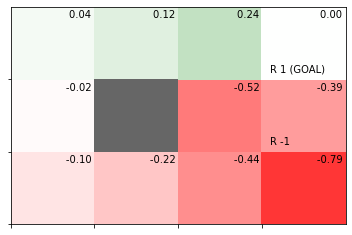

In [ ]:
env = GridWorld()
agent = RandomAgent()

episodes = 1000
for episode in range(episodes):
  state = env.reset()
  agent.reset()

  while True:
    action = agent.get_action(state)
    next_state, reward, done = env.step(action)

    agent.add(state, action, reward)
    if done:
      agent.eval()
      break

    state = next_state

env.render_v(agent.V)

## 5.4 モンテカルロ法による方策制御
- 前節：モンテカルロ法を用いた方策評価
- 今節：モンテカルロ法を用いた方策制御

### 5.4.1 評価と改善
以下を繰り返して、最適方策を得る。
- 評価フェーズ：方策を評価して価値関数を得る
- 改善フェーズ：価値関数をgreedy化することで方策を改善する  
価値関数Vの評価には環境のモデルが必要であるため、モンテカルロ法の更新式では、Q関数を用いる。

### 5.4.2 モンテカルロ法を使った方策制御の実装

In [ ]:
def greedy_probs(Q, state, action_size=4):
  qs = [Q[(state, action)] for action in range(action_size)]
  max_action = np.argmax(qs)

  action_probs = {action: 0.0 for action in range(action_size)}
  action_probs[max_action] = 1#①
  return action_probs

In [ ]:
class McAgent:
  def __init__(self):
    self.gamma = 0.9
    self.action_size = 4

    random_actions = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
    self.pi = defaultdict(lambda: random_actions)
    self.Q = defaultdict(lambda: 0) #VではなくQを用いる
    self.cnts = defaultdict(lambda: 0)
    self.memory = []
    
  def get_action(self, state):
    action_probs = self.pi[state]
    actions = list(action_probs.keys())
    probs = list(action_probs.values())
    return np.random.choice(actions, p=probs)

  def add(self, state, action, reward):
    data = (state, action, reward)
    self.memory.append(data)

  def reset(self):
    self.memory.clear()

  def update(self):
    G = 0
    for data in reversed(self.memory):
      state, action, reward = data
      G = self.gamma * G + reward
      key = (state, action)
      self.cnts[key] +=1
      self.Q[key] += (G - self.Q[key]) / self.cnts[key] #②

      self.pi[state] = greedy_probs(self.Q, state)

上記のコードでは上手くいかない。改善点は以下の２点。
- コード①：完全なgreedyではなく、ε-greedyにする
- コード②：Qの更新は「固定値α方式」で行う

### 5.4.3 ε-greedy法（一つ目の修正）
エージェントは改善フェーズで方策をgreedy化する。  
greedy化するとある状態で行う行動は一つに固定される。  
この問題を解決するために、「探索」を行わせる。

In [ ]:
def greedy_probs(Q, state, epsilon=0, action_size=4):
  qs = [Q[(state, action)] for action in range(action_size)]
  max_action = np.argmax(qs)

  base_prob = epsilon / action_size
  action_probs = {action: base_prob for action in range(action_size)}
  action_probs[max_action] += (1 - epsilon)
  return action_probs

### 5.4.4 固定値α方式へ（2つ目の修正）

In [ ]:
class McAgent:
  def __init__(self):
    self.gamma = 0.9
    self.alpha = 0.1
    self.epsilon = 0.1
    self.action_size = 4

    random_actions = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
    self.pi = defaultdict(lambda: random_actions)
    self.Q = defaultdict(lambda: 0) #VではなくQを用いる
    self.cnts = defaultdict(lambda: 0)
    self.memory = []
    
  def get_action(self, state):
    action_probs = self.pi[state]
    actions = list(action_probs.keys())
    probs = list(action_probs.values())
    return np.random.choice(actions, p=probs)

  def add(self, state, action, reward):
    data = (state, action, reward)
    self.memory.append(data)

  def reset(self):
    self.memory.clear()

  def update(self):
    G = 0
    for data in reversed(self.memory):
      state, action, reward = data
      G = self.gamma * G + reward
      key = (state, action)
      self.cnts[key] +=1
      self.Q[key] += (G - self.Q[key]) * self.alpha

      self.pi[state] = greedy_probs(self.Q, state, self.epsilon)

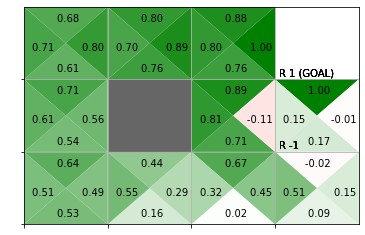

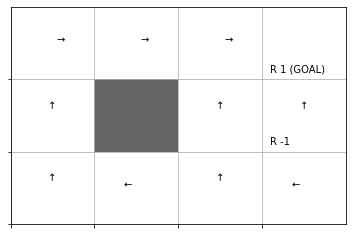

In [ ]:
env = GridWorld()
agent = McAgent()

episodes = 10000
for episode in range(episodes):
  state = env.reset()
  agent.reset()

  while True:
    action = agent.get_action(state)
    next_state, reward, done = env.step(action)

    agent.add(state, action, reward)
    if done:
      agent.update()
      break
    
    state = next_state

env.render_q(agent.Q)

## 5.5 方策オフ型と重点サンプリング
ε-greedy方は妥協案  
方策オン型とオフ型を考える。

### 5.5.1 方策オン型とオフ型
- 方策オフ型：別の場所で得られた経験から自分の方策を改善する
- 方策オン型：自分で得た経験から自分の方策を改善する  
エージェントの方策
- ターゲット方策：評価と改善の対象となる方策
- 挙動方策：エージェントが実際に行動を起こす際に使う方策→「状態、行動、報酬」のサンプルデータが生成  
この二つが同じ場合、方策オン型。

### 5.5.2 重点サンプリング
重点サンプリング：ある確率分布の期待値を別の確率分布からサンプリングしたデータを使って計算する手法  

In [ ]:
#期待値Eπ[x]を求めることが目標
import numpy as np
x = np.array([1, 2, 3])
pi = np.array([0.1, 0.1, 0.8])

#期待値
e = np.sum(x * pi)
print('E_pi[x]', e)

#モンテカルロ法
n = 100
samples = []
for _ in range (n):
  s = np.random.choice(x, p=pi) #piを使ってサンプリング
  samples.append(s)

mean = np.mean(samples)
var = np.var(samples)
print('MC: {:.2f} (var: {:.2f})'.format(mean, var))

E_pi[x] 2.7
MC: 2.75 (var: 0.39)


分散：データXとXの平均であるE[X]の差を二乗した値の期待値


In [ ]:
b = np.array([1/3, 1/3, 1/3])
n = 100
samples = []

for _ in range(n):
  idx = np.arange(len(b)) #[0, 1, 2]
  i = np.random.choice(idx, p=b) # bを使ってサンプリング
  s = x[i]
  rho = pi[i] / b[i]
  samples.append(rho * s)

mean = np.mean(samples)
var = np.var(samples)
print('IS: {:.2f} (var: {:.2f})'.format(mean, var))

IS: 2.34 (var: 9.19)


### 5.5.3 分散を小さくするには
分散が小さいほど、少ないサンプル数で精度良く近似できる。  
上記プログラムでは、重みを掛けた結果、分散が大きくなった。

In [ ]:
b = np.array([0.2, 0.2, 0.6])#確率分布を変更
n = 100
samples = []

for _ in range(n):
  idx = np.arange(len(b))
  i = np.random.choice(idx, p=b)
  s = x[i]
  rho = pi[i] / b[i]
  samples.append(rho * s)

mean = np.mean(samples)
var = np.var(samples)
print('IS: {:.2f} (var: {:.2f})'.format(mean, var))

IS: 2.73 (var: 2.44)


# 6章 TD法
モンテカルロ法を使えば、環境のモデルを使わずに方策を評価することができ、評価と改善を交互に繰り返すことで、最適方策を得ることができる。モンテカルロ法はエピソードの「終わり」にたどり着いてから出ないと価値関数の更新ができない。エピソードの終わりになって初めて「収益」が確定する。

## 6.1 TD法による方策評価
TD法：Temporal Difference  
「モンテカルロ法」と「動的計画法」を合わせたような手法

### 6.1.1 TD法の導出
TD法の重要な点は以下の２点
- DP法のように、ブートストラップにより価値関数を逐次更新できる
- MC法のように、環境に関する知識を必要とせずにサンプリングされたデータを使って価値関数を更新できる。

### 6.1.2 MC法とTD法の比較
MC法のターゲットは、多くの時間を積み重ねて得られた結果であるため、その値は「ばらつき」が大きくなる。  
TD法は１ステップ先のデータに基づくので、その変動は小さくなる。  
TD法は「推定値で推定値を更新しており」、ブートストラッピングである。

### 6.1.3 TD法の実装

In [ ]:
class TdAgent:
  def __init__(self):
    self.gamma = 0.9
    self.alpha = 0.01
    self.action_size = 4

    random_actions = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
    self.pi = defaultdict(lambda: random_actions)
    self.V = defaultdict(lambda: 0)

  def get_action(self, state):
    action_probs = self.pi[state]
    actions = list(action_probs.keys())
    probs = list(action_probs.values())
    return np.random.choice(actions, p=probs)

  def eval(self, state, reward, next_state, done):
    next_V = 0 if done else self.V[next_state]
    target = reward + self.gamma * next_V

    self.V[state] += (target -self.V[state]) * self.alpha

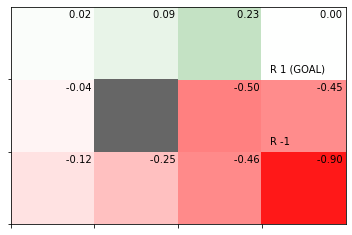

In [ ]:
env = GridWorld()
agent = TdAgent()

episodes = 1000
for episode in range(episodes):
  state = env.reset()

  while True:
    action = agent.get_action(state)
    next_state, reward, done = env.step(action)

    agent.eval(state, reward, next_state, done)#毎回呼ぶ
    if done:
      break
    state = next_state

env.render_v(agent.V)

## 6.2 SARSA
前節ではTD法による方策評価  
今節ではSARSAによる方策制御

### 6.2.1 方策ON型のSARSA

### 6.2.2 SARSAの実装

In [ ]:
from collections import defaultdict, deque
import numpy as np
 
class SarsaAgent:
  def __init__(self):
    self.gamma = 0.9
    self.alpha = 0.8
    self.epsilon = 0.1
    self.action_size = 4

    random_actions = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
    self.pi = defaultdict(lambda: random_actions)
    self.Q = defaultdict(lambda: 0)
    self.memory = deque(maxlen=2) #①dequeを使う 最大要素数を超える要素が追加されたらFIFOする

  def get_action(self, state):
    action_probs = self.pi[state] #②piから選ぶ
    actions = list(action_probs.keys())
    probs = list(action_probs.values())
    return np.random.choice(actions, p=probs)

  def reset(self):
    self.memory.clear()

  def update(self, state, action, reward, done):
    self.memory.append((state, action, reward, done))
    if len(self.memory) < 2:
      return

    state, action, reward, done = self.memory[0]
    next_state, next_action, _, _ = self.memory[1]
    #③次のQ関数
    next_q = 0 if done else self.Q[next_state, next_action]

    #④TD法による更新
    target = reward + self.gamma * next_q
    self.Q[state, action] += (target - self.Q[state, action]) * self.alpha
    
    #⑤方策の改善
    self.pi[state] = greedy_probs(self.Q, state, self.epsilon)

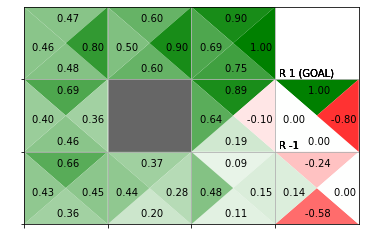

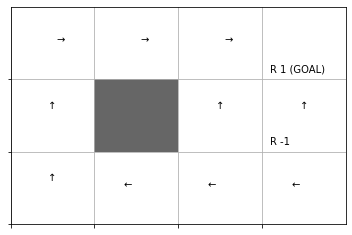

In [ ]:
env = GridWorld()
agent = SarsaAgent()

episodes =10000
for episode in range(episodes):
  state = env.reset()
  agent.reset()

  while True:
    action = agent.get_action(state)
    next_state, reward, done = env.step(action)
    agent.update(state, action, reward, done) #毎回呼ぶ

    if done:
      agent.update(next_state, None, None, None)
      break
    state = next_state

env.render_q(agent.Q)

## 6.3 方策オフ型のSARSA

### 6.3.1 方策オフ型と重点サンプリング
挙動方策からターゲット方策に切り替える時、以下に気を付ける。  
- 挙動方策とターゲット方策は似たような確率分布である方が結果は安定する。
- 2つの方策が異なるため、重点サンプリングを使って重みρによる補正を行う。

### 6.3.2 方策オフ型のSARSAの実装

In [ ]:
class SarsaOffPolicyAgent:
  def __init__(self):
    self.gamma = 0.9
    self.alpha = 0.8
    self.epsilon = 0.1
    self.action_size = 4

    random_actions = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
    self.pi = defaultdict(lambda: random_actions)
    self.b = defaultdict(lambda: random_actions)
    self.Q = defaultdict(lambda: 0)
    self.memory = deque(maxlen=2)

  def get_action(self, state):
    action_probs = self.b[state] #①挙動方策から取得
    actions = list(action_probs.keys())
    probs = list(action_probs.values())
    return np.random.choice(actions, p=probs)

  def reset(self):
    self.memory.clear()

  def update(self, state, action, reward, done):
    self.memory.append((state, action, reward, done))
    if len(self.memory) < 2:
      return

    state, action, reward, done = self.memory[0]
    next_state, next_action, _, _ = self.memory[1]

    if done:
      next_q = 0
      rho = 1
    else:
      next_q = self.Q[next_state, next_action]
      #②重みrhoを求める
      rho = self.pi[next_state][next_action] / self.b[next_state][next_action]

    #③rhoによるTDターゲットの補正
    target = rho * (reward + self.gamma * next_q)
    self.Q[state, action] += (target - self.Q[state, action]) * self.alpha
    
    #④方策の改善
    self.pi[state] = greedy_probs(self.Q, state, 0)
    self.b[state] = greedy_probs(self.Q, state, self.epsilon)

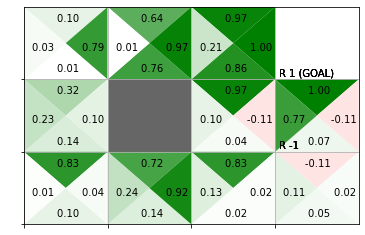

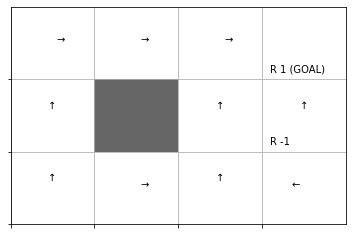

In [ ]:
env = GridWorld()
agent = SarsaOffPolicyAgent()

episodes =10000
for episode in range(episodes):
  state = env.reset()
  agent.reset()

  while True:
    action = agent.get_action(state)
    next_state, reward, done = env.step(action)
    agent.update(state, action, reward, done) #毎回呼ぶ

    if done:
      agent.update(next_state, None, None, None)
      break
    state = next_state

env.render_q(agent.Q)

## 6.4 Q学習
SARSAで用いる重点サンプリングは重みρが大きく変動し、Q関数の更新が不安定になる。  
これを解決するのがQ学習。Q学習の特徴は以下。
- TD法
- 方策オフ型
- 重点サンプリングを使わない

### 6.4.1 ベルマン方程式とSARSA
- ベルマン方程式→SARSA
- ベルマン最適方程式→Q学習

### 6.4.2 ベルマン最適方程式とQ学習
　ベルマン最適方程式による更新で、それをサンプリング版にした手法を考える。
行動At+1がQ関数の最大値によって選ばれる。

### 6.4.3 Q学習の実装

In [ ]:
from collections import defaultdict
import numpy as np

class QLearningAgent:
  def __init__(self):
    self.gamma = 0.9
    self.alpha = 0.8
    self.epsilon = 0.1
    self.action_size = 4

    random_actions = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
    self.pi = defaultdict(lambda: random_actions)
    self.b = defaultdict(lambda: random_actions) #挙動方策
    self.Q = defaultdict(lambda: 0)

  def get_action(self, state):
    action_probs = self.b[state] #挙動方策から取得
    actions = list(action_probs.keys())
    probs = list(action_probs.values())
    return np.random.choice(actions, p=probs)

  def update(self, state, action, reward, next_state, done):
    if done:
      next_q_max = 0
    else:
      next_qs = [self.Q[next_state, a] for a in range(self.action_size)]
      next_q_max = max(next_qs)

    target = reward + self.gamma * next_q_max
    self.Q[state, action] += (target - self.Q[state, action]) * self.alpha

    self.pi[state] = greedy_probs(self.Q, state, epsilon=0)
    self.b[state] = greedy_probs(self.Q, state, self.epsilon)

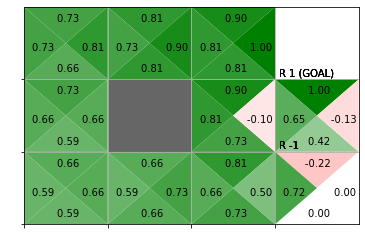

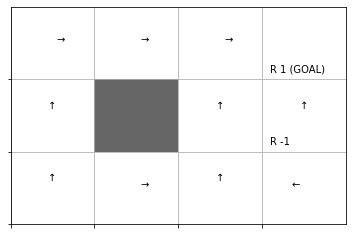

In [ ]:
##env = GridWorld()
agent = QLearningAgent()

episodes = 10000
for episodes in range(episodes):
  state = env.reset()

  while True:
    action = agent.get_action(state)
    next_state, reward, done = env.step(action)

    agent.update(state, action, reward, next_state, done)
    if done:
      break
    state = next_state

env.render_q(agent.Q)

## 6.5 分布モデルとサンプルモデル
TD法は以下がある。
- SARSA
- Q学習  
エージェントの実装方法は「分布モデル」と「サンプルモデル」がある。  
サンプルモデルの方がシンプルに実装できる。


### 6.5.1 分布モデルとサンプルモデル
「5.1 モンテカルロ法の基礎」：環境に関して分布モデルとサンプルモデルがある。  
それと同様のことがエージェントについても言える。

In [ ]:
from collections import defaultdict
import numpy as np

class RandomAgent:
  def __init__(self):
    random_actions = {0:0.25, 1:0.25, 2:0.25, 3:0.25}
    self.pi = defaultdict(lambda: random_actions)

  def get_action(self, state):
    action_probs = self.pi[state]
    actions = list(action_probs.keys())
    probs = list(action_probs.values())
    return np.random.choice(actions, p=probs) #サンプリング

### 6.5.2 サンプルモデル版のQ学習

In [ ]:
from collections import defaultdict
import numpy as np

class QLearningAgent:
  def __init__(self):
    self.gamma = 0.9
    self.alpha = 0.8
    self.epsilon = 0.1
    self.action_size = 4

    random_actions = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
    self.pi = defaultdict(lambda: random_actions)
    self.b = defaultdict(lambda: random_actions) #挙動方策
    self.Q = defaultdict(lambda: 0)

  def get_action(self, state):
    action_probs = self.b[state] #挙動方策から取得
    actions = list(action_probs.keys())
    probs = list(action_probs.values())
    return np.random.choice(actions, p=probs)

  def update(self, state, action, reward, next_state, done):
    if done:
      next_q_max = 0
    else:
      next_qs = [self.Q[next_state, a] for a in range(self.action_size)]
      next_q_max = max(next_qs)

    target = reward + self.gamma * next_q_max
    self.Q[state, action] += (target - self.Q[state, action]) * self.alpha

    self.pi[state] = greedy_probs(self.Q, state, epsilon=0)
    self.b[state] = greedy_probs(self.Q, state, self.epsilon)

In [ ]:
from collections import defaultdict
import numpy as np

class QLearningAgent:
  def __init__(self):
    self.gamma = 0.9
    self.alpha = 0.8
    self.epsilon = 0.1
    self.action_size = 4

    random_actions = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
    # self.pi = defaultdict(lambda: random_actions) self.piは使わない
    self.b = defaultdict(lambda: random_actions) #挙動方策
    self.Q = defaultdict(lambda: 0)

  def get_action(self, state):
    #このタイミングでε-greedy化
    self.b[state] = greedy_probs(self.Q, state, self.epsilon)
    action_probs = self.b[state]
    actions = list(action_probs.keys())
    probs = list(action_probs.values())
    return np.random.choice(actions, p=probs)

  def update(self, state, action, reward, next_state, done):
    if done:
      next_q_max = 0
    else:
      next_qs = [self.Q[next_state, a] for a in range(self.action_size)]
      next_q_max = max(next_qs)

    target = reward + self.gamma * next_q_max
    self.Q[state, action] += (target - self.Q[state, action]) * self.alpha

In [ ]:
from collections import defaultdict
import numpy as np

class QLearningAgent:
  def __init__(self):
    self.gamma = 0.9
    self.alpha = 0.8
    self.epsilon = 0.1
    self.action_size = 4
    self.Q = defaultdict(lambda: 0)

  def get_action(self, state):
    if np.random.rand() < self.epsilon:
      return np.random.choice(self.action_size)
    else:
      qs = [self.Q[state, a] for a in range(self.action_size)]
      return np.argmax(qs)

  def update(self, state, action, reward, next_state, done):
    if done:
      next_q_max = 0
    else:
      next_qs = [self.Q[next_state, a] for a in range(self.action_size)]
      next_q_max = max(next_qs)

    target = reward + self.gamma * next_q_max
    self.Q[state, action] += (target - self.Q[state, action]) * self.alpha

## 6.6 まとめ
TD法は（モンテカルロ法と同じく）エージェントが実際に行動した結果から価値関数を評価する。  
TD法の特徴は、「今」と「次」の情報だけから価値関数を更新する。  
モンテカルロ法はエージェントがゴールに着いて初めて価値関数を更新する。  
これにより、TD法の方が、価値関数の更新が速くなることが期待できる。  

TD法：
- SARSA：方策オン型の手法。ε-greedy化によって「探索」と「活用」を行う。  
- Q学習：方策オン型の手法。重点サンプリングを使わずにQ関数を更新する。

# 7章 ニューラルネットワークとQ学習
実際の問題は状態が膨大にあり、すべての状態を持つことは現実的ではない。この問題を解決するには、Q関数をコンパクトな関数で近似することが考えられる。そのための最も有力な手法がディープラーニング。

## 7.1 DeZeroの基礎
DeZeroはPyTorch版のようなもの。

### 7.1.1 DeZeroを使う

In [ ]:
import numpy as np
from dezero import Variable

x_np = np.array(5.0)
x = Variable(x_np)

y = 3 * x ** 2
print(y)

variable(75.0)


In [ ]:
y.backward()
print(x.grad)

variable(30.0)


### 7.1.2 多次元配列（テンソル）と関数

In [ ]:
import numpy as np
from dezero import Variable
import dezero.functions as F

#ベクトルの内積
a = np.array([1,2,3])
b = np.array([4,5,6])
a ,b = Variable(a), Variable(b) #省略可能
c = F.matmul(a, b)
print(c)

#行列の積
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])
c = F.matmul(a, b)
print(c)

variable(32)
variable([[19 22]
          [43 50]])


### 7.1.3 最適化

In [ ]:
import numpy as np
from dezero import Variable

def rosenbrock(x0, x1):
  y = 100 * (x1 - x0 ** 2) ** 2 + (x0 - 1 ) ** 2
  return y

x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

y = rosenbrock(x0, x1)
y.backward()
print(x0.grad, x1.grad)

variable(-2.0) variable(400.0)


In [ ]:
x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

lr = 0.001 #学習率
iters = 10000 #繰り返す回数

for i in range(iters):
  #print(x0, x1)
  y = rosenbrock(x0, x1)

  x0.cleargrad()
  x1.cleargrad()
  y.backward()

  x0.data -= lr * x0.grad.data
  x1.data -= lr * x1.grad.data

print(x0, x1)

variable(0.9944984367782456) variable(0.9890050527419593)


## 7.2 線形回帰

### 7.2.1 トイ・データセット

### 7.2.2 線形回帰の理論

### 7.2.3 線形回帰の実装

In [ ]:
import numpy as np
from dezero import Variable
import dezero.functions as F

#トイ・データセット
np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)
x, y = Variable(x), Variable(y) #省略可能

W = Variable(np.zeros((1,1)))
b = Variable(np.zeros(1))

def predict(x):
  y = F.matmul(x, W) + b
  return y

In [ ]:
def mean_squared_error(x0, x1):
  diff = x0 - x1
  return F.sum(diff ** 2) / len(diff)

lr = 0.1
iters = 100

for i in range(iters):
  y_pred = predict(x)
  loss = mean_squared_error(y, y_pred)
  W.cleargrad()
  b.cleargrad()
  loss.backward()

  W.data -= lr * W.grad.data
  b.data -= lr * b.grad.data

  if i % 10 == 0:
    print(loss.data)
  
print('===')
print('W=', W.data)
print('b=', b.data)

42.296340129442335
0.24915731977561134
0.10078974954301652
0.09461859803040694
0.0902667138137311
0.08694585483964615
0.08441084206493275
0.08247571022229121
0.08099850454041051
0.07987086218625004
===
W= [[2.11807369]]
b= [5.46608905]


## 7.3 ニューラルネットワーク

### 7.3.1 非線形なデータセット

### 7.3.2 線形変換と活性化関数

### 7.3.3 ニューラルネットワークの実装

In [ ]:
#W1, b1 = Variable(...), Variable(...)
#W2, b2 = Variable(...), Variable(...)

def predict(x):
  y = F.linear(x, W1, b1)
  y = F.sigmoid(y)
  y = F.linear(y, W2, b2)
  return y

In [ ]:
import numpy as np
import dezero.functions as F

#データセット
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2*np.pi*x) + np.random.rand(100,1)

#①重みの初期化
I, H, O = 1, 10, 1
W1 = Variable(0.01*np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01*np.random.randn(H, O))
b2 = Variable(np.zeros(O))

#②ニューラルネットワークの推論
def predict(x):
  y = F.linear(x, W1, b1)
  y = F.sigmoid(y)
  y = F.linear(y, W2, b2)
  return y

lr = 0.2
iters = 10000

#③ニューラルネットワークの学習
for i in range(iters):
  y_pred = predict(x)
  loss = F.mean_squared_error(y, y_pred)

  W1.cleargrad()
  b1.cleargrad()
  W2.cleargrad()
  b2.cleargrad()

  loss.backward()

  W1.data -= lr * W1.grad.data
  b1.data -= lr * b1.grad.data
  W2.data -= lr * W2.grad.data
  b2.data -= lr * b2.grad.data
  if i % 1000 == 0:
    print(loss.data)

0.8473695850105871
0.2514286285183606
0.24759485466749878
0.23786120447054837
0.21222231333102975
0.16742181117834257
0.0968193261999275
0.07849528290602342
0.07749729552991162
0.07722132399559321


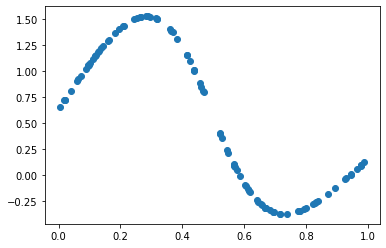

In [ ]:
plt.scatter(x,y_pred.data)

### 7.3.4 レイヤとモデル

In [ ]:
import numpy as np
import dezero.layers as L


linear = L.Linear(10)

batch_size, input_size = 100, 5
x = np.random.randn(batch_size, input_size)
y = linear(x)

print('y shape:', y.shape)
print('param shape:', linear.W.shape, linear.b.shape)

for param in linear.params():
  print(param.name, param.shape)

y shape: (100, 10)
param shape: (5, 10) (10,)
W (5, 10)
b (10,)


In [ ]:
from dezero import Model
import dezero.layers as L
import dezero.functions as F

class TwoLayerNet(Model):
  def __init__(self, hidden_size, out_size):
    super().__init__()
    self.l1 = L.Linear(hidden_size)
    self.l2 = L.Linear(out_size)

  def forward(self, x):
    y = F.relu(self.l1(x))
    y = self.l2(y)
    return y

In [ ]:
import numpy as np
from dezero import Model
import dezero.layers as L
import dezero.functions as F

# データセットの生成
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2*np.pi*x) + np.random.rand(100, 1)

lr = 0.2
iters = 10000

class TwoLayerNet(Model):
  def __init__(self, hidden_size, out_size):
    super().__init__()
    self.l1 = L.Linear(hidden_size)
    self.l2 = L.Linear(out_size)

  def forward(self, x):
    y = F.sigmoid(self.l1(x))
    y = self.l2(y)
    return y

model = TwoLayerNet(10, 1)

for i in range(iters):
  y_pred = model.forward(x)#model(x)でも同じ動き
  loss = F.mean_squared_error(y, y_pred)

  model.cleargrads()
  loss.backward()

  for p in model.params():
    p.data -= lr * p.grad.data

  if i%1000 == 0:
    print(loss)

variable(0.8165178492839196)
variable(0.24990280802148895)
variable(0.24609876581126014)
variable(0.2372159081431807)
variable(0.20793216413350174)
variable(0.12311905720649353)
variable(0.07888166506355149)
variable(0.07655073683421637)
variable(0.0763780308623822)
variable(0.07618764131185572)


### 7.3.5 オプティマイザ（最適化手法）

In [ ]:
import numpy as np
from dezero import Model
from dezero import optimizers
import dezero.layers as L
import dezero.functions as F

#データセットの生成
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2*np.pi*x) + np.random.rand(100, 1)

lr = 0.2
iters = 10000

class TwoLayerNet(Model):
  def __init__(self, hidden_size, out_size):
    super().__init__()
    self.l1 = L.Linear(hidden_size)
    self.l2 = L.Linear(out_size)

  def forward(self, x):
    y = F.sigmoid(self.l1(x))
    y = self.l2(y)
    return y

model = TwoLayerNet(10, 1)
optimizer = optimizers.SGD(lr)
optimizer.setup(model)

for i in range(iters):
  y_pred = model(x)
  loss = F.mean_squared_error(y, y_pred)

  model.cleargrads()
  loss.backward()

  optimizer.update()
  if i % 1000 == 0:
    print(loss)

variable(0.8165178492839196)
variable(0.24990280802148895)
variable(0.24609876581126014)
variable(0.2372159081431807)
variable(0.20793216413350174)
variable(0.12311905720649353)
variable(0.07888166506355149)
variable(0.07655073683421637)
variable(0.0763780308623822)
variable(0.07618764131185572)


## 7.4 Q学習とニューラルネットワーク

### 7.4.1 ニューラルネットワークの前処理
状態をone-hotベクトルに変換する。

In [ ]:
import numpy as np

def one_hot(state):
  HEIGHT, WIDTH = 3, 4
  vec = np.zeros(HEIGHT * WIDTH, dtype=np.float32)
  y, x = state
  idx = WIDTH * y + x
  vec[idx] = 1.0
  return vec[np.newaxis, :]#バッチ処理のための新しい軸を追加

state = (2, 0)
x = one_hot(state)

print(x.shape)
print(x)

(1, 12)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


### 7.4.2 Q関数を表すニューラルネットワーク

In [ ]:
from collections import defaultdict

Q = defaultdict(lambda: 0)
state = (2, 0)
action = 0

print(Q[state, action]) 

0


In [ ]:
#状態を入力とするネットワークを実装する
from dezero import Model
import dezero.functions as F
import dezero.layers as L

class QNet(Model):
  def __init__(self):
    super().__init__()
    self.l1 = L.Linear(100)
    self.l2 = L.Linear(4)

  def forward(self, x):
    x = F.relu(self.l1(x))
    x = self.l2(x)
    return x

qnet = QNet()

state = (2, 0)
state = one_hot(state)

qs = qnet(state)
print(qs.shape)

(1, 4)


In [ ]:
state.shape

(1, 12)

### 7.4.3 ニューラルネットワークとQ学習
Q関数を以下の式に変形し、  
Q'(St, At) = Q(St, At) + α{T- Q(St, At)}  
入力がSt, Atの時、出力がTとなるようにQ関数を更新すると解釈する。  

In [ ]:
class QLearningAgent:
  def __init__(self):
    self.gamma = 0.9
    self.lr = 0.01
    self.epsilon = 0.1
    self.action_size = 4

    self.qnet = QNet()
    self.optimizer = optimizers.SGD(self.lr)
    self.optimizer.setup(self.qnet)

  def get_action(self, state):
    if np.random.rand() < self.epsilon:
      return np.random.choice(self.action_size)
    else:
      qs  = self.qnet(state)
      return qs.data.argmax()

  def update(self, state, action, reward, next_state, done):
    if done:
      next_q = np.zeros(1)
    else:
      next_qs = self.qnet(next_state)
      next_q = next_qs.max(axis=1)
      next_q.unchain()

    target = self.gamma * next_q + reward
    qs = self.qnet(state)
    q = qs[:, action]
    loss = F.mean_squared_error(target, q)

    self.qnet.cleargrads()
    loss.backward()
    self.optimizer.update()

    return loss.data

In [ ]:
env = GridWorld()
agent = QLearningAgent()

episodes = 1000
loss_history = []

for episode in range(episodes):
  state = env.reset()
  state = one_hot(state)
  total_loss, cnt = 0, 0
  done = False

  while not done:
    action = agent.get_action(state)
    next_state, reward, done = env.step(action)
    next_state = one_hot(next_state)
    
    loss = agent.update(state, action, reward, next_state, done)
    total_loss += loss
    cnt += 1
    state = next_state

  average_loss = total_loss / cnt
  loss_history.append(average_loss)

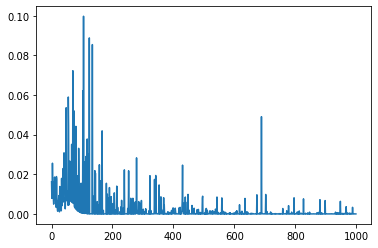

In [ ]:
plt.plot(loss_history)

## 7.5 まとめ

# 8章 DQN
DQN：Q学習とニューラルネットワークを使った手法。  
前章から「経験再生」と「ターゲットネットワーク」が使われる。  

## 8.1 OpenAI Gym

### 8.1.1 OpenAI Gymの基礎知識

In [ ]:
import gym
env = gym.make('CartPole-v0')

state = env.reset()
print(state)

action_space = env.action_space
print(action_space)

[ 0.02080043 -0.02677895  0.01740444  0.00548107]
Discrete(2)


In [ ]:
action = 0
next_state, reward, done, info = env.step(action)
print(next_state)

[ 0.02026485 -0.22214612  0.01751406  0.30360409]


### 8.1.2 ランダムなエージェント

In [ ]:
import numpy as np
import gym

env = gym.make('CartPole-v0')
state = env.reset()
done = False

while not done:
  env.render()
  action = np.random.choice([0, 1])
  next_state, reward, done, info = env.step(action)
env.chose()

NoSuchDisplayException: ignored